# __Home Price Prediction with the Help of Geographic/Geospatial Features__

In [2]:
import pandas as pd

# Data Cleansing and Preprocessing

In [4]:
df = pd.read_csv(r"C:\Users\ahmty\Desktop\Python\geo_DSproject_github_clone\git_py\csv_output\combined\will be used\data with geospatial\ready_dataset\ready_for_model_v2.csv", sep=';')
df

,Street,City_Code,Price,Number of Rooms,Living Area,Land Size,URL,city_id,city_score,geo_score
0,Ascherbachweg 9,Dachau (85221),1.440.000 9.047,5 Zimmer,"159,2 m²",247 m² Grundstuck,https://www.immowelt.de/expose/77783c08-634a-4...,1050,"6,185",191
1,Dachau,Dachau (85221),1.049.000 8.069,5 Zimmer,130 m²,280 m² Grundstuck,https://www.immowelt.de/expose/b4bf236c-9716-4...,1050,"6,185",155
2,Dachau,Dachau (85221),999.000 8.687,5 Zimmer,115 m²,1.437 m² Grundstuck,https://www.immowelt.de/expose/e3f8ddd0-b5dd-4...,1050,"6,185",155
3,Dachau,Dachau (85221),179.800 5.073,1 Zimmer,"35,4 m²",Unknown,https://www.immowelt.de/expose/360b831f-00f2-4...,1050,"6,185",155
4,Dachau,Dachau (85221),199.800 4.861,1 Zimmer,"41,1 m²",Unknown,https://www.immowelt.de/expose/7a018fb8-0721-4...,1050,"6,185",155
...,...,...,...,...,...,...,...,...,...,...
49337,Aschendorf,Papenburg / Aschendorf (Ems) (26871),499.000 1.833,7 Zimmer,"272,2 m²","854,2 m² Grundstuck",https://www.immowelt.de/expose/766148c7-569f-4...,996,"2,773",127
49338,Papenburg - Untenende,Papenburg (26871),247.000 2.470,4 Zimmer,100 m²,468 m² Grundstuck,https://www.immowelt.de/expose/c52ef37a-7079-4...,996,"2,773",3
49339,Papenburg - Untenende,Papenburg (26871),247.000 2.470,4 Zimmer,100 m²,468 m² Grundstuck,https://www.immowelt.de/expose/9ac747d6-8443-4...,996,"2,773",3
49340,DÃ¶rpen,DÃ¶rpen (26892),335.000 3.278,3 Zimmer,"102,2 m²",Unknown,https://www.immowelt.de/expose/53d75b56-01af-4...,996,"2,773",0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49342 entries, 0 to 49341
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Street           49342 non-null  object
 1   City_Code        49342 non-null  object
 2   Price            49342 non-null  object
 3   Number of Rooms  49342 non-null  object
 4   Living Area      49342 non-null  object
 5   Land Size        49342 non-null  object
 6   URL              49342 non-null  object
 7   city_id          49342 non-null  int64 
 8   city_score       49342 non-null  object
 9   geo_score        49342 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.8+ MB


In [6]:
(df['geo_score'] == 0).sum()


15807

In [7]:
df = df[df['geo_score'] != 0]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 33535 entries, 0 to 49339
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Street           33535 non-null  object
 1   City_Code        33535 non-null  object
 2   Price            33535 non-null  object
 3   Number of Rooms  33535 non-null  object
 4   Living Area      33535 non-null  object
 5   Land Size        33535 non-null  object
 6   URL              33535 non-null  object
 7   city_id          33535 non-null  int64 
 8   city_score       33535 non-null  object
 9   geo_score        33535 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 2.8+ MB


In [8]:
(df['geo_score'] == 0).sum()

0

In [9]:
df.head()

,Street,City_Code,Price,Number of Rooms,Living Area,Land Size,URL,city_id,city_score,geo_score
0,Ascherbachweg 9,Dachau (85221),1.440.000 9.047,5 Zimmer,"159,2 m²",247 m² Grundstuck,https://www.immowelt.de/expose/77783c08-634a-4...,1050,"6,185",191
1,Dachau,Dachau (85221),1.049.000 8.069,5 Zimmer,130 m²,280 m² Grundstuck,https://www.immowelt.de/expose/b4bf236c-9716-4...,1050,"6,185",155
2,Dachau,Dachau (85221),999.000 8.687,5 Zimmer,115 m²,1.437 m² Grundstuck,https://www.immowelt.de/expose/e3f8ddd0-b5dd-4...,1050,"6,185",155
3,Dachau,Dachau (85221),179.800 5.073,1 Zimmer,"35,4 m²",Unknown,https://www.immowelt.de/expose/360b831f-00f2-4...,1050,"6,185",155
4,Dachau,Dachau (85221),199.800 4.861,1 Zimmer,"41,1 m²",Unknown,https://www.immowelt.de/expose/7a018fb8-0721-4...,1050,"6,185",155


In [10]:
# Function to remove the first element from the 'Price' column
def remove_first_element(price):
    try:
        # Split the price by space and create a list of parts
        price_parts = price.split()
        
        if len(price_parts) == 2:
            # Remove the first part and return the second part
            return price_parts[0]
        
        # If there's no space or invalid format, return the original price
        return price
        
    except Exception:
        return price  # If there's any error, return the original price

# Apply the remove_first_element function to the 'Price' column
df['Price'] = df['Price'].apply(lambda x: remove_first_element(str(x)))

# Define the output file path with the new name


C:\Users\ahmty\AppData\Local\Temp\ipykernel_15372\1169419391.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].apply(lambda x: remove_first_element(str(x)))


In [11]:
df_clean_price = df.iloc[:,0:10]
df_clean_price

,Street,City_Code,Price,Number of Rooms,Living Area,Land Size,URL,city_id,city_score,geo_score
0,Ascherbachweg 9,Dachau (85221),1.440.000,5 Zimmer,"159,2 m²",247 m² Grundstuck,https://www.immowelt.de/expose/77783c08-634a-4...,1050,"6,185",191
1,Dachau,Dachau (85221),1.049.000,5 Zimmer,130 m²,280 m² Grundstuck,https://www.immowelt.de/expose/b4bf236c-9716-4...,1050,"6,185",155
2,Dachau,Dachau (85221),999.000,5 Zimmer,115 m²,1.437 m² Grundstuck,https://www.immowelt.de/expose/e3f8ddd0-b5dd-4...,1050,"6,185",155
3,Dachau,Dachau (85221),179.800,1 Zimmer,"35,4 m²",Unknown,https://www.immowelt.de/expose/360b831f-00f2-4...,1050,"6,185",155
4,Dachau,Dachau (85221),199.800,1 Zimmer,"41,1 m²",Unknown,https://www.immowelt.de/expose/7a018fb8-0721-4...,1050,"6,185",155
...,...,...,...,...,...,...,...,...,...,...
49334,Aschendorf,Papenburg (26871),190.000,"1,5 Zimmer",50 m²,frei ab sofort,https://www.immowelt.de/expose/4fa6f7e6-d9f5-4...,996,"2,773",127
49336,Papenburg - Untenende,Papenburg (26871),560.000,8 Zimmer,"207,4 m²",1.482 m² Grundstuck,https://www.immowelt.de/expose/2f9a49ed-a293-4...,996,"2,773",3
49337,Aschendorf,Papenburg / Aschendorf (Ems) (26871),499.000,7 Zimmer,"272,2 m²","854,2 m² Grundstuck",https://www.immowelt.de/expose/766148c7-569f-4...,996,"2,773",127
49338,Papenburg - Untenende,Papenburg (26871),247.000,4 Zimmer,100 m²,468 m² Grundstuck,https://www.immowelt.de/expose/c52ef37a-7079-4...,996,"2,773",3


In [12]:
#checkpoint
df_clean_price_copy =df_clean_price.copy()

In [13]:
df_clean_price_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33535 entries, 0 to 49339
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Street           33535 non-null  object
 1   City_Code        33535 non-null  object
 2   Price            33535 non-null  object
 3   Number of Rooms  33535 non-null  object
 4   Living Area      33535 non-null  object
 5   Land Size        33535 non-null  object
 6   URL              33535 non-null  object
 7   city_id          33535 non-null  int64 
 8   city_score       33535 non-null  object
 9   geo_score        33535 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 2.8+ MB


In [14]:

# Örnek: Sadece belirli sütunları sayıya dönüştürmek için sütun isimlerini belirleyin
columns_to_clean = ["City_Code", "Number of Rooms", "Living Area", "Land Size"]  # Sayısal veriler içeren sütunları buraya ekleyin

import pandas as pd
import re

# Örnek: Temizlemek istediğiniz sütunları belirtin

def clean_numeric_value(value):
    try:
        # Geçerli sayısal karakterleri yakala ve yalnızca ilk noktayı koru
        cleaned_value = re.sub(r'[^0-9.]', '', value)  # Sayısal olmayan karakterleri kaldır
        cleaned_value = re.sub(r'\.(?=.*\.)', '', cleaned_value)  # Yalnızca ilk noktayı koru

        # Sonucu sayıya dönüştür ve geri döndür
        return float(cleaned_value) if cleaned_value else None
    except ValueError:
        return None  # Dönüştürülemeyen değerleri None olarak bırak

# Belirtilen sütunlarda temizleme işlemi uygula
for col in columns_to_clean:
    df_clean_price_copy[col] = df_clean_price_copy[col].apply(lambda x: clean_numeric_value(str(x)))

df_clean_price_copy

,Street,City_Code,Price,Number of Rooms,Living Area,Land Size,URL,city_id,city_score,geo_score
0,Ascherbachweg 9,85221.0,1.440.000,5.0,1592.0,247.000,https://www.immowelt.de/expose/77783c08-634a-4...,1050,"6,185",191
1,Dachau,85221.0,1.049.000,5.0,130.0,280.000,https://www.immowelt.de/expose/b4bf236c-9716-4...,1050,"6,185",155
2,Dachau,85221.0,999.000,5.0,115.0,1.437,https://www.immowelt.de/expose/e3f8ddd0-b5dd-4...,1050,"6,185",155
3,Dachau,85221.0,179.800,1.0,354.0,NaN,https://www.immowelt.de/expose/360b831f-00f2-4...,1050,"6,185",155
4,Dachau,85221.0,199.800,1.0,411.0,NaN,https://www.immowelt.de/expose/7a018fb8-0721-4...,1050,"6,185",155
...,...,...,...,...,...,...,...,...,...,...
49334,Aschendorf,26871.0,190.000,15.0,50.0,NaN,https://www.immowelt.de/expose/4fa6f7e6-d9f5-4...,996,"2,773",127
49336,Papenburg - Untenende,26871.0,560.000,8.0,2074.0,1.482,https://www.immowelt.de/expose/2f9a49ed-a293-4...,996,"2,773",3
49337,Aschendorf,26871.0,499.000,7.0,2722.0,8542.000,https://www.immowelt.de/expose/766148c7-569f-4...,996,"2,773",127
49338,Papenburg - Untenende,26871.0,247.000,4.0,100.0,468.000,https://www.immowelt.de/expose/c52ef37a-7079-4...,996,"2,773",3


In [15]:
df_clean_price_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33535 entries, 0 to 49339
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Street           33535 non-null  object 
 1   City_Code        33535 non-null  float64
 2   Price            33535 non-null  object 
 3   Number of Rooms  33383 non-null  float64
 4   Living Area      32580 non-null  float64
 5   Land Size        23225 non-null  float64
 6   URL              33535 non-null  object 
 7   city_id          33535 non-null  int64  
 8   city_score       33535 non-null  object 
 9   geo_score        33535 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 2.8+ MB


In [16]:
typecast_data_copy = df_clean_price_copy.copy()

In [17]:
# Number of Rooms => int
typecast_data_copy['City_Code'] = typecast_data_copy['City_Code'].astype("int")


typecast_data_copy['city_score'] = typecast_data_copy['city_score'].str.replace(',', '.').astype(float)


typecast_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33535 entries, 0 to 49339
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Street           33535 non-null  object 
 1   City_Code        33535 non-null  int32  
 2   Price            33535 non-null  object 
 3   Number of Rooms  33383 non-null  float64
 4   Living Area      32580 non-null  float64
 5   Land Size        23225 non-null  float64
 6   URL              33535 non-null  object 
 7   city_id          33535 non-null  int64  
 8   city_score       33535 non-null  float64
 9   geo_score        33535 non-null  int64  
dtypes: float64(4), int32(1), int64(2), object(3)
memory usage: 2.7+ MB


In [18]:
# thousand and deciamal seperator
typecast_data_copy['Price'] = (
    typecast_data_copy['Price']
    .str.replace('.', '', regex=False)     # Binlik ayırıcı noktaları kaldır
    .str.replace(',', '.', regex=False)    # Ondalık virgülü noktaya çevir
)

# nan if not numerical
typecast_data_copy['Price'] = pd.to_numeric(typecast_data_copy['Price'], errors='coerce')
typecast_data_copy = typecast_data_copy.dropna(subset=['Price'])

# price => int
typecast_data_copy['Price'] = typecast_data_copy['Price'].astype(int)

typecast_data_copy


,Street,City_Code,Price,Number of Rooms,Living Area,Land Size,URL,city_id,city_score,geo_score
0,Ascherbachweg 9,85221,1440000,5.0,1592.0,247.000,https://www.immowelt.de/expose/77783c08-634a-4...,1050,6.185,191
1,Dachau,85221,1049000,5.0,130.0,280.000,https://www.immowelt.de/expose/b4bf236c-9716-4...,1050,6.185,155
2,Dachau,85221,999000,5.0,115.0,1.437,https://www.immowelt.de/expose/e3f8ddd0-b5dd-4...,1050,6.185,155
3,Dachau,85221,179800,1.0,354.0,NaN,https://www.immowelt.de/expose/360b831f-00f2-4...,1050,6.185,155
4,Dachau,85221,199800,1.0,411.0,NaN,https://www.immowelt.de/expose/7a018fb8-0721-4...,1050,6.185,155
...,...,...,...,...,...,...,...,...,...,...
49334,Aschendorf,26871,190000,15.0,50.0,NaN,https://www.immowelt.de/expose/4fa6f7e6-d9f5-4...,996,2.773,127
49336,Papenburg - Untenende,26871,560000,8.0,2074.0,1.482,https://www.immowelt.de/expose/2f9a49ed-a293-4...,996,2.773,3
49337,Aschendorf,26871,499000,7.0,2722.0,8542.000,https://www.immowelt.de/expose/766148c7-569f-4...,996,2.773,127
49338,Papenburg - Untenende,26871,247000,4.0,100.0,468.000,https://www.immowelt.de/expose/c52ef37a-7079-4...,996,2.773,3


In [19]:
# trun to object (str)
typecast_data_copy['Land Size'] = typecast_data_copy['Land Size'].astype(str)

# change the , to . (i have used csv. in there i had to use , for decimal seperator becuse of some reasons)
typecast_data_copy['Land Size'] = typecast_data_copy['Land Size'].str.replace(',', '.')

# delete thousand seperator
typecast_data_copy['Land Size'] = typecast_data_copy['Land Size'].str.replace('.', '', regex=False)

# convert it float
typecast_data_copy['Land Size'] = pd.to_numeric(typecast_data_copy['Land Size'], errors='coerce')

typecast_data_copy


,Street,City_Code,Price,Number of Rooms,Living Area,Land Size,URL,city_id,city_score,geo_score
0,Ascherbachweg 9,85221,1440000,5.0,1592.0,2470.0,https://www.immowelt.de/expose/77783c08-634a-4...,1050,6.185,191
1,Dachau,85221,1049000,5.0,130.0,2800.0,https://www.immowelt.de/expose/b4bf236c-9716-4...,1050,6.185,155
2,Dachau,85221,999000,5.0,115.0,1437.0,https://www.immowelt.de/expose/e3f8ddd0-b5dd-4...,1050,6.185,155
3,Dachau,85221,179800,1.0,354.0,NaN,https://www.immowelt.de/expose/360b831f-00f2-4...,1050,6.185,155
4,Dachau,85221,199800,1.0,411.0,NaN,https://www.immowelt.de/expose/7a018fb8-0721-4...,1050,6.185,155
...,...,...,...,...,...,...,...,...,...,...
49334,Aschendorf,26871,190000,15.0,50.0,NaN,https://www.immowelt.de/expose/4fa6f7e6-d9f5-4...,996,2.773,127
49336,Papenburg - Untenende,26871,560000,8.0,2074.0,1482.0,https://www.immowelt.de/expose/2f9a49ed-a293-4...,996,2.773,3
49337,Aschendorf,26871,499000,7.0,2722.0,85420.0,https://www.immowelt.de/expose/766148c7-569f-4...,996,2.773,127
49338,Papenburg - Untenende,26871,247000,4.0,100.0,4680.0,https://www.immowelt.de/expose/c52ef37a-7079-4...,996,2.773,3


In [20]:
typecast_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32965 entries, 0 to 49339
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Street           32965 non-null  object 
 1   City_Code        32965 non-null  int32  
 2   Price            32965 non-null  int32  
 3   Number of Rooms  32842 non-null  float64
 4   Living Area      32064 non-null  float64
 5   Land Size        22855 non-null  float64
 6   URL              32965 non-null  object 
 7   city_id          32965 non-null  int64  
 8   city_score       32965 non-null  float64
 9   geo_score        32965 non-null  int64  
dtypes: float64(4), int32(2), int64(2), object(2)
memory usage: 2.5+ MB


In [21]:
# 'Number of Rooms' drop the instances have 1 number of room
typecast_data_copy = typecast_data_copy[typecast_data_copy['Number of Rooms'] != 1] 
# because in most cases if there is a one room living size is 400m2, which is not true. those are the ads for the realtors

In [22]:
round(typecast_data_copy.describe(), 2)
# I will drop the number of rooms more than 10
# I will drop the land size more than 700
# i will drop the living size more than 6000
# i will drop the geo_score more than 500

,City_Code,Price,Number of Rooms,Living Area,Land Size,city_id,city_score,geo_score
count,3.193100e+04,3.193100e+04,31808.00,31036.00,22257.00,31931.00,31931.00,31931.00
mean,4.164580e+04,6.168559e+05,43.72,475.73,35346.88,3111.65,3.85,236.82
std,1.659817e+07,1.357138e+07,362.66,687.44,894103.38,1531.07,1.16,241.82
min,-2.147484e+09,-2.147484e+09,1.01,1.00,10.00,19.00,1.65,3.00
25%,2.413100e+04,2.750000e+05,3.00,102.00,30.00,1414.00,2.86,84.00
50%,4.438800e+04,4.320000e+05,4.00,167.00,2620.00,3491.00,3.63,165.00
75%,6.052900e+04,6.790000e+05,7.00,669.00,5510.00,4077.00,5.04,291.00
max,2.045720e+09,6.319000e+08,9757.00,9847.00,31122026.00,5759.00,6.30,1611.00


In [23]:
typecast_data_copy.describe

<bound method NDFrame.describe of                       Street  City_Code    Price  Number of Rooms  \
0            Ascherbachweg 9      85221  1440000              5.0   
1                     Dachau      85221  1049000              5.0   
2                     Dachau      85221   999000              5.0   
5                     Dachau      85221  2249000              5.0   
6                     Dachau      85221  2249000              5.0   
...                      ...        ...      ...              ...   
49334             Aschendorf      26871   190000             15.0   
49336  Papenburg - Untenende      26871   560000              8.0   
49337             Aschendorf      26871   499000              7.0   
49338  Papenburg - Untenende      26871   247000              4.0   
49339  Papenburg - Untenende      26871   247000              4.0   

       Living Area  Land Size  \
0           1592.0     2470.0   
1            130.0     2800.0   
2            115.0     1437.0   
5    

# ML Modeling

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error


In [26]:
df_model = typecast_data_copy  # load, from copied (data consistancy and chckpoint)

# target and features
X = df_model[['Living Area', 'Land Size', 'city_score', 'geo_score']]  # features
y = df_model['Price']  # target

# split into size and test train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# calculate the predic
rf_predictions = rf_model.predict(X)

# add prdict. to a new column
df_model.loc[:,'RF_Predicted_Price'] = rf_predictions


C:\Users\ahmty\AppData\Local\Temp\ipykernel_15372\3797752920.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.loc[:,'RF_Predicted_Price'] = rf_predictions


In [28]:
# XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# calculate the predic
xgb_predictions = xgb_model.predict(X)

# add prdict. to a new column
df_model.loc[:,'XGB_Predicted_Price'] = xgb_predictions


C:\Users\ahmty\AppData\Local\Temp\ipykernel_15372\3133666826.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.loc[:,'XGB_Predicted_Price'] = xgb_predictions


In [29]:
# Random Forest için MAE
rf_mae = mean_absolute_error(y, rf_predictions)
print(f'Random Forest MAE: {rf_mae}')

# XGBoost için MAE
xgb_mae = mean_absolute_error(y, xgb_predictions)
print(f'XGBoost MAE: {xgb_mae}')


Random Forest MAE: 254828.2339155698
XGBoost MAE: 304460.85179765674


In [30]:
df_model

,Street,City_Code,Price,Number of Rooms,Living Area,Land Size,URL,city_id,city_score,geo_score,RF_Predicted_Price,XGB_Predicted_Price
0,Ascherbachweg 9,85221,1440000,5.0,1592.0,2470.0,https://www.immowelt.de/expose/77783c08-634a-4...,1050,6.185,191,1.405990e+06,1.059658e+06
1,Dachau,85221,1049000,5.0,130.0,2800.0,https://www.immowelt.de/expose/b4bf236c-9716-4...,1050,6.185,155,9.472296e+05,7.116659e+05
2,Dachau,85221,999000,5.0,115.0,1437.0,https://www.immowelt.de/expose/e3f8ddd0-b5dd-4...,1050,6.185,155,1.262672e+06,8.531239e+05
5,Dachau,85221,2249000,5.0,224.0,8200.0,https://www.immowelt.de/expose/1c92fbb5-710e-4...,1050,6.185,155,1.892489e+06,1.512088e+06
6,Dachau,85221,2249000,5.0,224.0,8200.0,https://www.immowelt.de/expose/2d2654d9-e677-4...,1050,6.185,155,1.892489e+06,1.512088e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
49334,Aschendorf,26871,190000,15.0,50.0,NaN,https://www.immowelt.de/expose/4fa6f7e6-d9f5-4...,996,2.773,127,1.737107e+05,1.323640e+05
49336,Papenburg - Untenende,26871,560000,8.0,2074.0,1482.0,https://www.immowelt.de/expose/2f9a49ed-a293-4...,996,2.773,3,5.191830e+05,4.887920e+05
49337,Aschendorf,26871,499000,7.0,2722.0,85420.0,https://www.immowelt.de/expose/766148c7-569f-4...,996,2.773,127,5.564712e+05,5.770667e+05
49338,Papenburg - Untenende,26871,247000,4.0,100.0,4680.0,https://www.immowelt.de/expose/c52ef37a-7079-4...,996,2.773,3,2.458254e+05,3.037250e+05


# Visuals 

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


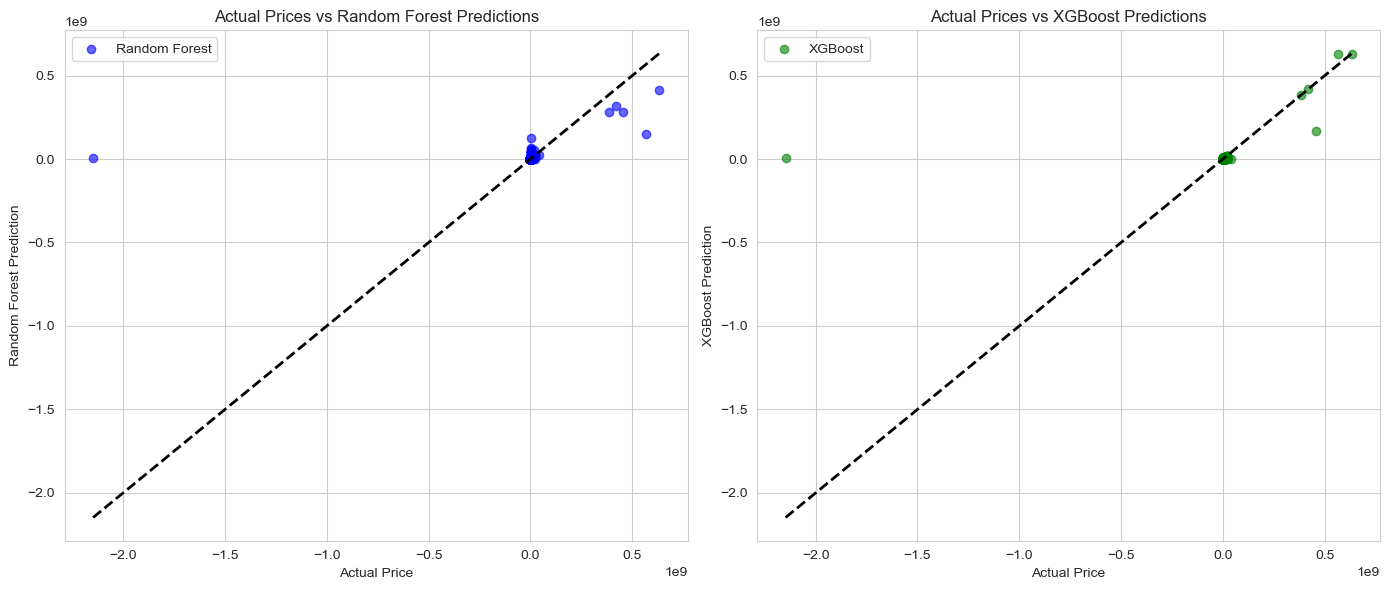

In [33]:
# Graph size and style settings
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Actual Prices vs Random Forest Predictions
plt.subplot(1, 2, 1)
plt.scatter(df_model['Price'], df_model['RF_Predicted_Price'], alpha=0.6, color="blue", label="Random Forest")
plt.plot([df_model['Price'].min(), df_model['Price'].max()], [df_model['Price'].min(), df_model['Price'].max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Random Forest Prediction")
plt.title("Actual Prices vs Random Forest Predictions")
plt.legend()

# Actual Prices vs XGBoost Predictions
plt.subplot(1, 2, 2)
plt.scatter(df_model['Price'], df_model['XGB_Predicted_Price'], alpha=0.6, color="green", label="XGBoost")
plt.plot([df_model['Price'].min(), df_model['Price'].max()], [df_model['Price'].min(), df_model['Price'].max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("XGBoost Prediction")
plt.title("Actual Prices vs XGBoost Predictions")
plt.legend()

plt.tight_layout()
plt.show()


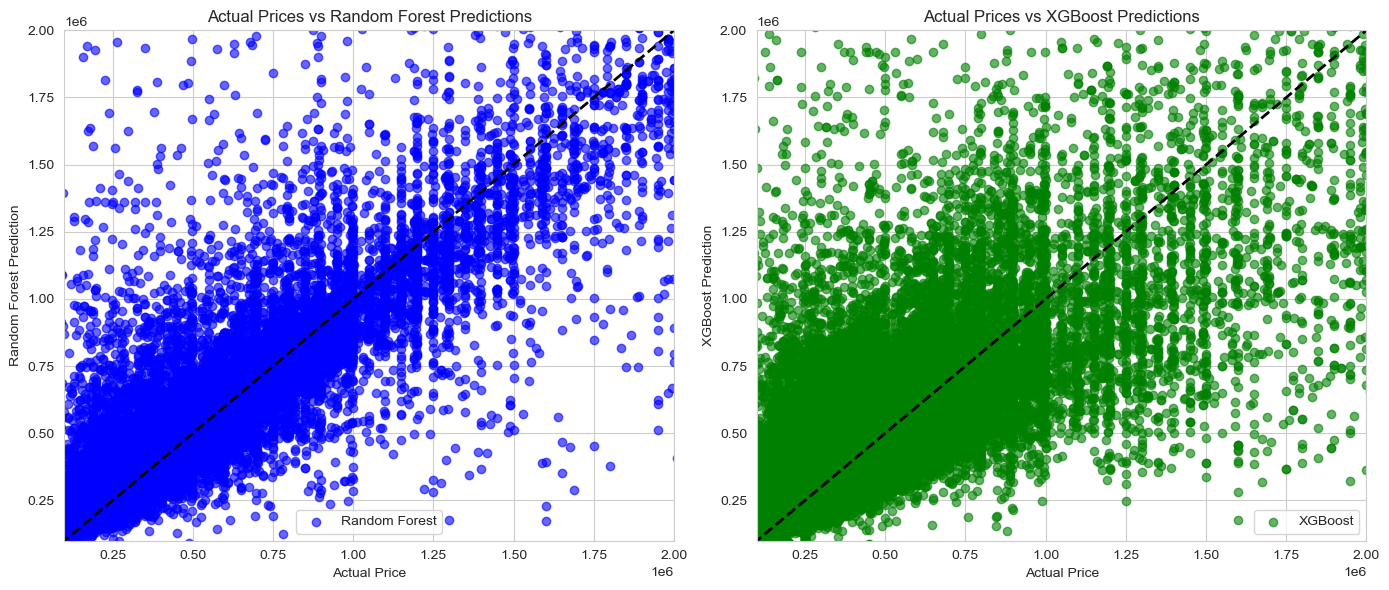

In [34]:
# Graph size and style settings
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Actual Prices vs Random Forest Predictions
plt.subplot(1, 2, 1)
plt.scatter(df_model['Price'], df_model['RF_Predicted_Price'], alpha=0.6, color="blue", label="Random Forest")
plt.plot([df_model['Price'].min(), df_model['Price'].max()], [df_model['Price'].min(), df_model['Price'].max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Random Forest Prediction")
plt.title("Actual Prices vs Random Forest Predictions")
plt.xlim(100000, 2000000)  # Limit x-axis range
plt.ylim(100000, 2000000)  # Limit y-axis range
plt.legend()

# Actual Prices vs XGBoost Predictions
plt.subplot(1, 2, 2)
plt.scatter(df_model['Price'], df_model['XGB_Predicted_Price'], alpha=0.6, color="green", label="XGBoost")
plt.plot([df_model['Price'].min(), df_model['Price'].max()], [df_model['Price'].min(), df_model['Price'].max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("XGBoost Prediction")
plt.title("Actual Prices vs XGBoost Predictions")
plt.xlim(100000, 2000000)  # Limit x-axis range
plt.ylim(100000, 2000000)  # Limit y-axis range
plt.legend()

plt.tight_layout()
plt.show()


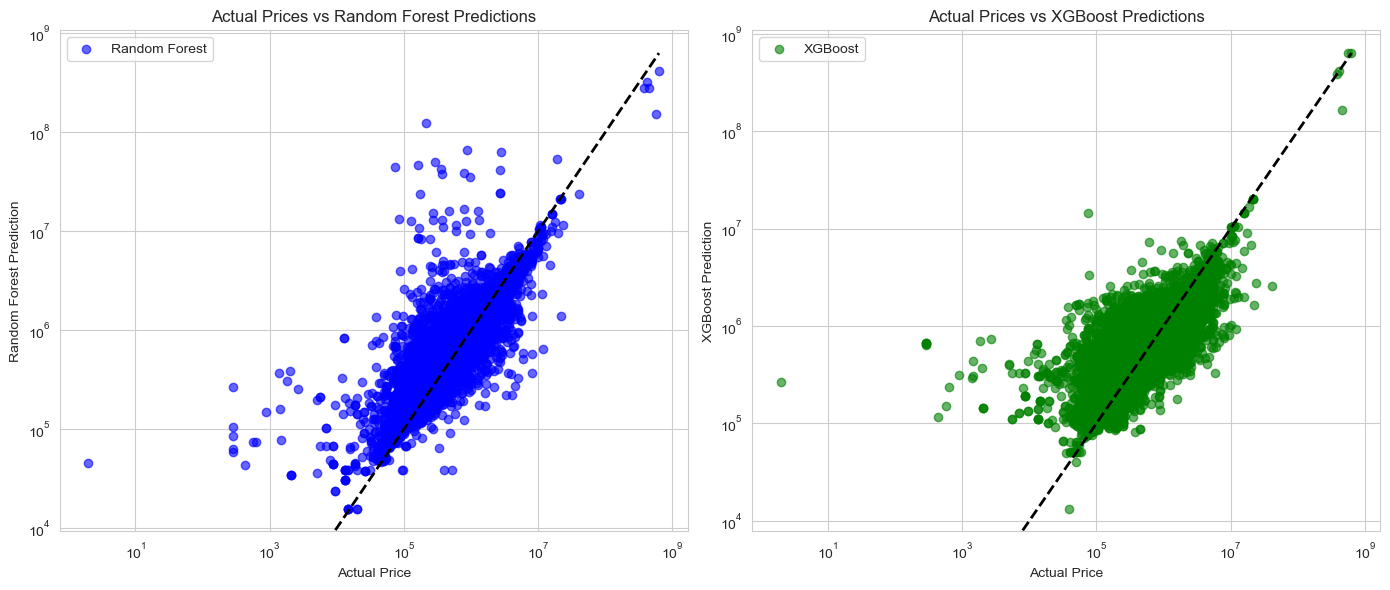

In [35]:
# Graph size and style settings
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Actual Prices vs Random Forest Predictions
plt.subplot(1, 2, 1)
plt.scatter(df_model['Price'], df_model['RF_Predicted_Price'], alpha=0.6, color="blue", label="Random Forest")
plt.plot([df_model['Price'].min(), df_model['Price'].max()], [df_model['Price'].min(), df_model['Price'].max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Random Forest Prediction")
plt.title("Actual Prices vs Random Forest Predictions")
plt.xscale('log')  # Apply log scale to x-axis
plt.yscale('log')  # Apply log scale to y-axis
plt.legend()

# Actual Prices vs XGBoost Predictions
plt.subplot(1, 2, 2)
plt.scatter(df_model['Price'], df_model['XGB_Predicted_Price'], alpha=0.6, color="green", label="XGBoost")
plt.plot([df_model['Price'].min(), df_model['Price'].max()], [df_model['Price'].min(), df_model['Price'].max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("XGBoost Prediction")
plt.title("Actual Prices vs XGBoost Predictions")
plt.xscale('log')  # Apply log scale to x-axis
plt.yscale('log')  # Apply log scale to y-axis
plt.legend()

plt.tight_layout()
plt.show()


In [36]:
#clean the everythong except numericals
#convert object into int and dummies
#drop num of room if it is 1

# 2nd model Reprocessing

In [38]:
round(typecast_data_copy.describe(), 2)


,City_Code,Price,Number of Rooms,Living Area,Land Size,city_id,city_score,geo_score,RF_Predicted_Price,XGB_Predicted_Price
count,3.193100e+04,3.193100e+04,31808.00,31036.00,22257.00,31931.00,31931.00,31931.00,3.193100e+04,3.193100e+04
mean,4.164580e+04,6.168559e+05,43.72,475.73,35346.88,3111.65,3.85,236.82,6.902843e+05,6.820453e+05
std,1.659817e+07,1.357138e+07,362.66,687.44,894103.38,1531.07,1.16,241.82,4.008265e+06,5.976804e+06
min,-2.147484e+09,-2.147484e+09,1.01,1.00,10.00,19.00,1.65,3.00,1.572714e+04,1.337133e+04
25%,2.413100e+04,2.750000e+05,3.00,102.00,30.00,1414.00,2.86,84.00,3.162875e+05,3.487338e+05
50%,4.438800e+04,4.320000e+05,4.00,167.00,2620.00,3491.00,3.63,165.00,4.639167e+05,4.925856e+05
75%,6.052900e+04,6.790000e+05,7.00,669.00,5510.00,4077.00,5.04,291.00,6.952920e+05,7.083107e+05
max,2.045720e+09,6.319000e+08,9757.00,9847.00,31122026.00,5759.00,6.30,1611.00,4.143506e+08,6.270627e+08


In [39]:
# I will drop the number of rooms more than 10
# I will drop the land size more than 700
# i will drop the living size more than 6000
# i will drop the geo_score more than 500

In [40]:
reprocessing_df = typecast_data_copy.copy()

In [41]:
# SINCE I DONT USE IN MODELIN I WILL NOT DROP THE COLUMN
#reprocessing_df = reprocessing_df[reprocessing_df['Number of Rooms'] <= 10]

# Check the updated summary
#round(reprocessing_df.describe(), 2)


In [42]:
# Drop rows where Land Size is greater than 6000
reprocessing_df = reprocessing_df[reprocessing_df['Land Size'] <= 6000]

# Check the updated summary
round(reprocessing_df.describe(), 2)


,City_Code,Price,Number of Rooms,Living Area,Land Size,city_id,city_score,geo_score,RF_Predicted_Price,XGB_Predicted_Price
count,1.770500e+04,1.770500e+04,17705.00,17705.00,17705.00,17705.00,17705.00,17705.00,1.770500e+04,1.770500e+04
mean,1.605693e+05,7.472064e+05,8.22,482.25,1980.82,3097.22,3.88,241.48,7.234986e+05,7.404968e+05
std,1.537409e+07,8.416880e+06,13.88,706.24,2069.94,1530.89,1.16,248.86,5.214856e+06,8.010120e+06
min,0.000000e+00,2.880000e+02,1.04,1.00,10.00,19.00,1.65,3.00,4.344095e+04,1.337133e+04
25%,2.285000e+04,2.900000e+05,3.00,110.00,20.00,1280.00,2.89,85.00,3.314129e+05,3.564608e+05
50%,4.486600e+04,4.490000e+05,5.00,163.00,1330.00,3491.00,3.66,166.00,4.759535e+05,4.975332e+05
75%,6.330300e+04,6.850000e+05,7.00,668.00,3950.00,4069.00,5.19,296.00,6.951144e+05,7.040014e+05
max,2.045720e+09,6.319000e+08,464.00,9847.00,6000.00,5759.00,6.30,1611.00,4.143506e+08,6.270627e+08


In [43]:
# Drop rows where Land Size is greater than 6000
reprocessing_df = reprocessing_df[reprocessing_df['Living Area'] <= 700]

# Check the updated summary
round(reprocessing_df.describe(), 2)


,City_Code,Price,Number of Rooms,Living Area,Land Size,city_id,city_score,geo_score,RF_Predicted_Price,XGB_Predicted_Price
count,13436.00,1.343600e+04,13436.00,13436.00,13436.00,13436.00,13436.00,13436.00,1.343600e+04,1.343600e+04
mean,45450.13,7.002796e+05,8.28,183.67,2005.73,3146.92,3.84,231.43,6.771063e+05,6.856433e+05
std,24120.70,7.115260e+06,14.02,147.29,2052.39,1520.70,1.16,230.59,3.891830e+06,6.511911e+06
min,0.00,4.300000e+02,1.04,1.00,10.00,19.00,1.65,3.00,4.344095e+04,1.337133e+04
25%,26125.00,2.750000e+05,3.00,96.00,23.00,1428.00,2.86,84.00,3.124347e+05,3.375347e+05
50%,44869.00,4.350000e+05,5.00,135.00,1435.50,3757.00,3.63,165.00,4.593407e+05,4.815010e+05
75%,63739.00,6.650000e+05,7.00,200.00,3900.00,4079.00,5.04,287.00,6.775426e+05,6.846321e+05
max,99867.00,5.649000e+08,464.00,700.00,6000.00,5759.00,6.30,1611.00,2.814386e+08,6.270627e+08


In [44]:
# Cap the geo score at 500 for all samples where the geo score exceeds 500

#reprocessing_df = reprocessing_df[reprocessing_df['geo_score'] <= 500]

# Check the updated summary
round(reprocessing_df.describe(), 2)


,City_Code,Price,Number of Rooms,Living Area,Land Size,city_id,city_score,geo_score,RF_Predicted_Price,XGB_Predicted_Price
count,13436.00,1.343600e+04,13436.00,13436.00,13436.00,13436.00,13436.00,13436.00,1.343600e+04,1.343600e+04
mean,45450.13,7.002796e+05,8.28,183.67,2005.73,3146.92,3.84,231.43,6.771063e+05,6.856433e+05
std,24120.70,7.115260e+06,14.02,147.29,2052.39,1520.70,1.16,230.59,3.891830e+06,6.511911e+06
min,0.00,4.300000e+02,1.04,1.00,10.00,19.00,1.65,3.00,4.344095e+04,1.337133e+04
25%,26125.00,2.750000e+05,3.00,96.00,23.00,1428.00,2.86,84.00,3.124347e+05,3.375347e+05
50%,44869.00,4.350000e+05,5.00,135.00,1435.50,3757.00,3.63,165.00,4.593407e+05,4.815010e+05
75%,63739.00,6.650000e+05,7.00,200.00,3900.00,4079.00,5.04,287.00,6.775426e+05,6.846321e+05
max,99867.00,5.649000e+08,464.00,700.00,6000.00,5759.00,6.30,1611.00,2.814386e+08,6.270627e+08


# 2nd ML Model

In [46]:
df_model2 = reprocessing_df  # load, from copied (data consistancy and chckpoint)

# target and features
X2 = df_model2[['Living Area', "Land Size",'city_score', 'geo_score']]  # features
y2 = df_model2['Price']  # target

# split into size and test train
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42) #chagend the test_size 0.3 to 0.2


In [47]:
# Random Forest Model
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model2.fit(X_train2, y_train2)

# calculate the predic
rf_predictions2 = rf_model2.predict(X2)

# add prdict. to a new column
df_model2.loc[:,'RF_Predicted_Price'] = rf_predictions2


In [48]:
# XGBoost Model
xgb_model2 = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model2.fit(X_train2, y_train2)

# calculate the predic
xgb_predictions2 = xgb_model2.predict(X2)

# add prdict. to a new column
df_model2.loc[:,'XGB_Predicted_Price'] = xgb_predictions2


In [49]:
# Random Forest için MAE
rf_mae2 = mean_absolute_error(y2, rf_predictions2)
print(f'Random Forest MAE v2: {rf_mae2}')

# XGBoost için MAE
xgb_mae2 = mean_absolute_error(y2, xgb_predictions2)
print(f'XGBoost MAE v2: {xgb_mae2}')


Random Forest MAE v2: 147742.44534546888
XGBoost MAE v2: 175995.79091081678


# 2nd Visuals 

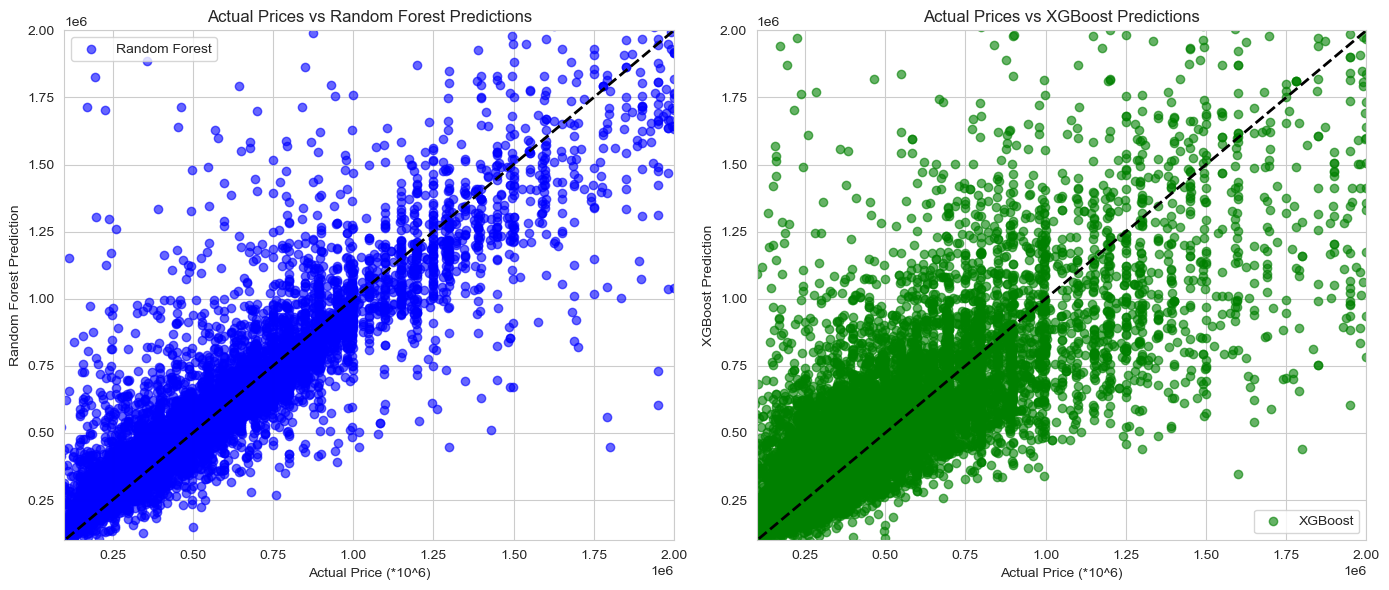

In [51]:
# Graph size and style settings
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Actual Prices vs Random Forest Predictions
plt.subplot(1, 2, 1)
plt.scatter(df_model2['Price'], df_model2['RF_Predicted_Price'], alpha=0.6, color="blue", label="Random Forest")
plt.plot([df_model2['Price'].min(), df_model2['Price'].max()], [df_model2['Price'].min(), df_model2['Price'].max()], 'k--', lw=2)
plt.xlabel("Actual Price (*10^6)")
plt.ylabel("Random Forest Prediction")
plt.title("Actual Prices vs Random Forest Predictions")
plt.xlim(100000, 2000000)  # Limit x-axis range
plt.ylim(100000, 2000000)  # Limit y-axis range
plt.legend()

# Actual Prices vs XGBoost Predictions
plt.subplot(1, 2, 2)
plt.scatter(df_model2['Price'], df_model2['XGB_Predicted_Price'], alpha=0.6, color="green", label="XGBoost")
plt.plot([df_model2['Price'].min(), df_model2['Price'].max()], [df_model2['Price'].min(), df_model2['Price'].max()], 'k--', lw=2)
plt.xlabel("Actual Price (*10^6)")
plt.ylabel("XGBoost Prediction")
plt.title("Actual Prices vs XGBoost Predictions")
plt.xlim(100000, 2000000)  # Limit x-axis range
plt.ylim(100000, 2000000)  # Limit y-axis range
plt.legend()

plt.tight_layout()
plt.show()


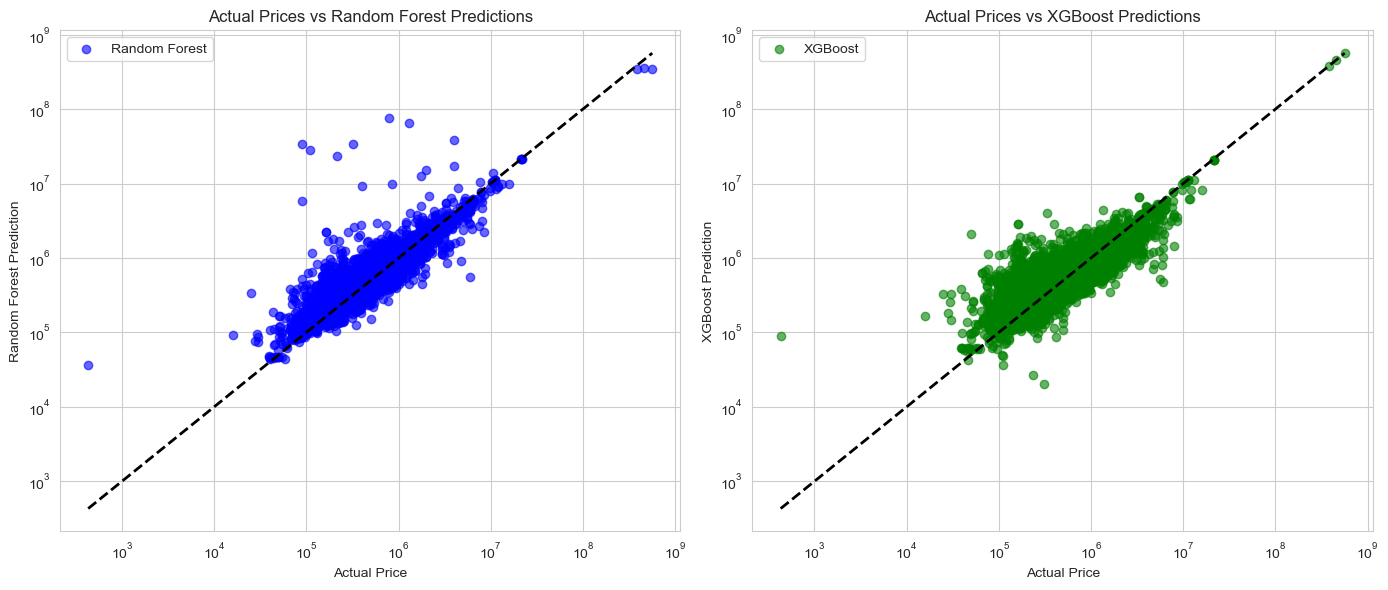

In [52]:
# Graph size and style settings
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Actual Prices vs Random Forest Predictions
plt.subplot(1, 2, 1)
plt.scatter(df_model2['Price'], df_model2['RF_Predicted_Price'], alpha=0.6, color="blue", label="Random Forest")
plt.plot([df_model2['Price'].min(), df_model2['Price'].max()], [df_model2['Price'].min(), df_model2['Price'].max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Random Forest Prediction")
plt.title("Actual Prices vs Random Forest Predictions")
plt.xscale('log')  # Apply log scale to x-axis
plt.yscale('log')  # Apply log scale to y-axis
plt.legend()

# Actual Prices vs XGBoost Predictions
plt.subplot(1, 2, 2)
plt.scatter(df_model2['Price'], df_model2['XGB_Predicted_Price'], alpha=0.6, color="green", label="XGBoost")
plt.plot([df_model2['Price'].min(), df_model2['Price'].max()], [df_model2['Price'].min(), df_model2['Price'].max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("XGBoost Prediction")
plt.title("Actual Prices vs XGBoost Predictions")
plt.xscale('log')  # Apply log scale to x-axis
plt.yscale('log')  # Apply log scale to y-axis
plt.legend()

plt.tight_layout()
plt.show()


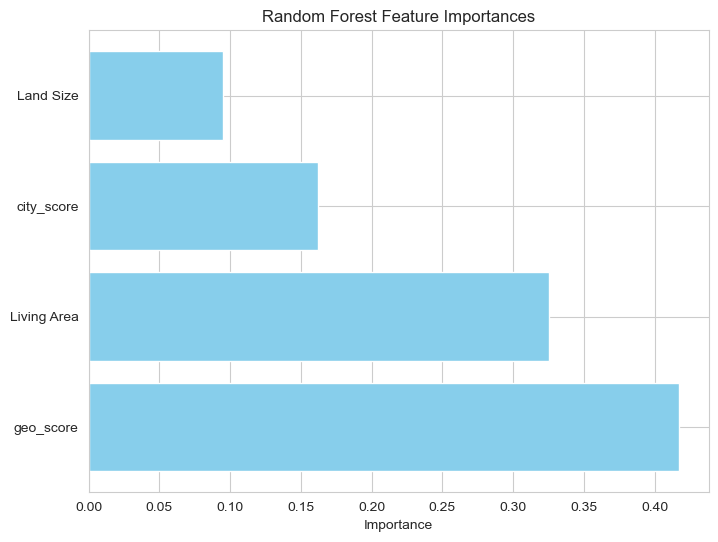

       Feature  Importance
3    geo_score    0.417289
0  Living Area    0.325472
2   city_score    0.162055
1    Land Size    0.095183


In [53]:
# Get feature importances from the Random Forest model
rf_feature_importances = rf_model2.feature_importances_

# Create a DataFrame for feature importance
rf_feature_importance_df = pd.DataFrame({
    'Feature': X2.columns,
    'Importance': rf_feature_importances
})

# Sort the feature importances in descending order
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(rf_feature_importance_df['Feature'], rf_feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

# Print the feature importances DataFrame
print(rf_feature_importance_df)


In [54]:
# i am two minded if i should remove the land size
# i will assess those bullet points and will decide
#           correlation analysy
#           domanin knowlegde
#           model peformance

In [55]:
#closer to -1 or 1 indicates a high correlatoion
#but - means inverse ratio

correlation_matrix = df_model2[['Price','Living Area', 'Land Size', 'city_score', 'geo_score']].corr()
print(correlation_matrix)


                Price  Living Area  Land Size  city_score  geo_score
Price        1.000000     0.020282   0.000870    0.001783  -0.004126
Living Area  0.020282     1.000000  -0.065108    0.032489   0.059851
Land Size    0.000870    -0.065108   1.000000   -0.199903  -0.261317
city_score   0.001783     0.032489  -0.199903    1.000000   0.360008
geo_score   -0.004126     0.059851  -0.261317    0.360008   1.000000


In [57]:
df_model2

,Street,City_Code,Price,Number of Rooms,Living Area,Land Size,URL,city_id,city_score,geo_score,RF_Predicted_Price,XGB_Predicted_Price
1,Dachau,85221,1049000,5.0,130.0,2800.0,https://www.immowelt.de/expose/b4bf236c-9716-4...,1050,6.185,155,809598.43,8.114332e+05
2,Dachau,85221,999000,5.0,115.0,1437.0,https://www.immowelt.de/expose/e3f8ddd0-b5dd-4...,1050,6.185,155,1262170.00,1.188810e+06
7,Dachau,85221,849000,6.0,156.0,3970.0,https://www.immowelt.de/expose/9df85412-7551-4...,1050,6.185,155,861148.44,9.096932e+05
8,Steinkirchen,85221,1184900,5.0,187.0,5810.0,https://www.immowelt.de/expose/dbd25792-14ac-4...,1050,6.185,50,1202374.99,1.092674e+06
21,Dachau,85221,275000,15.0,46.0,10.0,https://www.immowelt.de/expose/b0ce8b68-1fb5-4...,1050,6.185,155,281981.10,3.421524e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
49317,Sandberg 28a,26871,275000,15.0,292.0,1072.0,https://www.immowelt.de/expose/35c1e11a-4a7c-4...,996,2.773,39,424719.00,6.748184e+05
49327,Papenburg - Obenende,26871,159000,3.0,695.0,2220.0,https://www.immowelt.de/expose/df679c23-752f-4...,996,2.773,65,576449.97,6.451661e+05
49332,Papenburg - Untenende,26871,189000,2.0,585.0,20.0,https://www.immowelt.de/expose/33585f22-1701-4...,996,2.773,3,198262.01,1.922052e+05
49338,Papenburg - Untenende,26871,247000,4.0,100.0,4680.0,https://www.immowelt.de/expose/c52ef37a-7079-4...,996,2.773,3,265005.96,3.007233e+05


In [58]:
# the results show that i will continue with random forest

In [59]:
# built an further process that makes decision on if the an house is entered manually how much will it be listed
# function gives an interval after manual entry 
# and second function: decide if the listed priced is over-/underpriced 

# 3nd Model (with new feature)

In [113]:
df_model3 = reprocessing_df.copy()

In [115]:
#new feature

In [117]:
df_model3['Living_Land_Interaction'] = df_model3['Living Area'] * df_model3['Land Size']


In [119]:



X3 = df_model3[['Living Area', "Land Size",'city_score', 'geo_score']]  # features
y3 = df_model3['Price']  # target

# split into size and test train
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42) #chagend the test_size 0.3 to 0.2


In [121]:
# Random Forest Model
rf_model3 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model3.fit(X_train3, y_train3)

# calculate the predic
rf_predictions3 = rf_model3.predict(X3)

# add prdict. to a new column
df_model3.loc[:,'RF_Predicted_Price'] = rf_predictions3


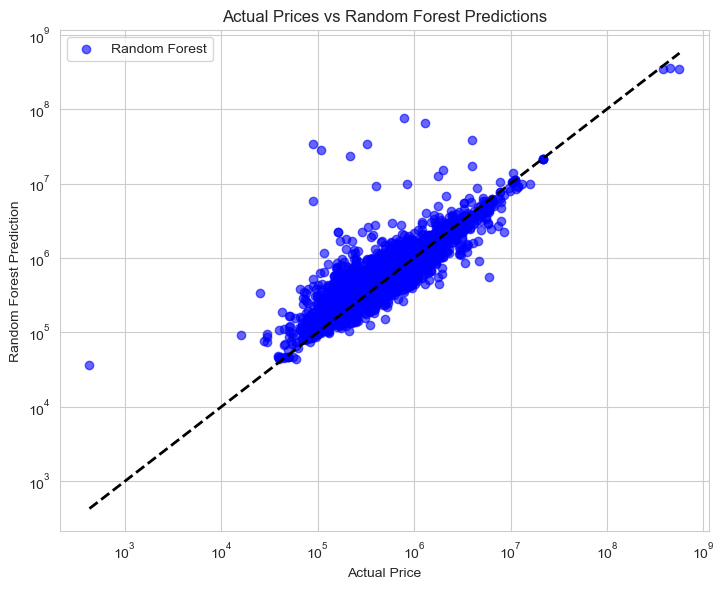

In [122]:
# Graph size and style settings
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Actual Prices vs Random Forest Predictions
plt.subplot(1, 2, 1)
plt.scatter(df_model3['Price'], df_model3['RF_Predicted_Price'], alpha=0.6, color="blue", label="Random Forest")
plt.plot([df_model3['Price'].min(), df_model3['Price'].max()], [df_model3['Price'].min(), df_model3['Price'].max()], 'k--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Random Forest Prediction")
plt.title("Actual Prices vs Random Forest Predictions")
plt.xscale('log')  # Apply log scale to x-axis
plt.yscale('log')  # Apply log scale to y-axis
plt.legend()

plt.tight_layout()
plt.show()


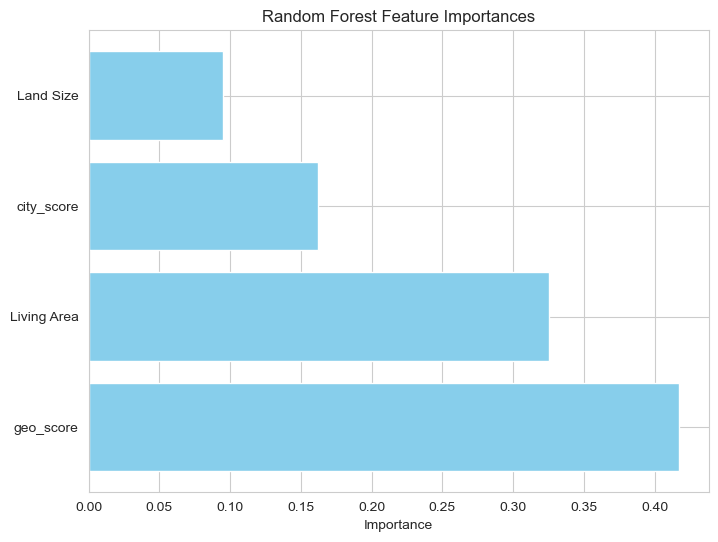

       Feature  Importance
3    geo_score    0.417289
0  Living Area    0.325472
2   city_score    0.162055
1    Land Size    0.095183


In [123]:
# Get feature importances from the Random Forest model
rf_feature_importances3 = rf_model3.feature_importances_

# Create a DataFrame for feature importance
rf_feature_importance_df3 = pd.DataFrame({
    'Feature': X3.columns,
    'Importance': rf_feature_importances3
})

# Sort the feature importances in descending order
rf_feature_importance_df3 = rf_feature_importance_df3.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.barh(rf_feature_importance_df3['Feature'], rf_feature_importance_df3['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

# Print the feature importances DataFrame
print(rf_feature_importance_df3)


In [124]:
# Random Forest için MAE
rf_mae3 = mean_absolute_error(y3, rf_predictions3)
print(f'Random Forest MAE v3: {rf_mae3}')


Random Forest MAE v3: 147742.44534546888


In [125]:
df_model3

,Street,City_Code,Price,Number of Rooms,Living Area,Land Size,URL,city_id,city_score,geo_score,RF_Predicted_Price,XGB_Predicted_Price,Living_Land_Interaction
1,Dachau,85221,1049000,5.0,130.0,2800.0,https://www.immowelt.de/expose/b4bf236c-9716-4...,1050,6.185,155,809598.43,8.114332e+05,364000.0
2,Dachau,85221,999000,5.0,115.0,1437.0,https://www.immowelt.de/expose/e3f8ddd0-b5dd-4...,1050,6.185,155,1262170.00,1.188810e+06,165255.0
7,Dachau,85221,849000,6.0,156.0,3970.0,https://www.immowelt.de/expose/9df85412-7551-4...,1050,6.185,155,861148.44,9.096932e+05,619320.0
8,Steinkirchen,85221,1184900,5.0,187.0,5810.0,https://www.immowelt.de/expose/dbd25792-14ac-4...,1050,6.185,50,1202374.99,1.092674e+06,1086470.0
21,Dachau,85221,275000,15.0,46.0,10.0,https://www.immowelt.de/expose/b0ce8b68-1fb5-4...,1050,6.185,155,281981.10,3.421524e+05,460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49317,Sandberg 28a,26871,275000,15.0,292.0,1072.0,https://www.immowelt.de/expose/35c1e11a-4a7c-4...,996,2.773,39,424719.00,6.748184e+05,313024.0
49327,Papenburg - Obenende,26871,159000,3.0,695.0,2220.0,https://www.immowelt.de/expose/df679c23-752f-4...,996,2.773,65,576449.97,6.451661e+05,1542900.0
49332,Papenburg - Untenende,26871,189000,2.0,585.0,20.0,https://www.immowelt.de/expose/33585f22-1701-4...,996,2.773,3,198262.01,1.922052e+05,11700.0
49338,Papenburg - Untenende,26871,247000,4.0,100.0,4680.0,https://www.immowelt.de/expose/c52ef37a-7079-4...,996,2.773,3,265005.96,3.007233e+05,468000.0


In [126]:
# Count of null and NaN values in 'Land Size' column
null_count = df_model3['Land Size'].isnull().sum()
nan_count = df_model3['Land Size'].isna().sum()  # NaN check is typically same as null check
print(f"Null values: {null_count}, NaN values: {nan_count}")


Null values: 0, NaN values: 0


In [127]:
# Save the DataFrame to a CSV file
df_model3.to_csv(r'C:\Users\ahmty\Desktop\html\df_model3.csv', index=False)


In [128]:
# i chech the ad url when there are anomalies. and saw that the ads with anomalies either a ad of the realtor or a fake ad that now can not be reached
# i see the model over all give a solid good results

In [135]:
#manual input

# Example manual input data (replace these values with your desired inputs)
manual_input = [[205 , 700 , 4.564, 376]]  # Living Area, Land Size, city_score, geo_score


# Predict the price for the manual input
manual_prediction = rf_model3.predict(manual_input)

# Display the prediction
print("Predicted Price for Manual Input:", manual_prediction[0])


Predicted Price for Manual Input: 1014717.8


C:\Users\ahmty\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


when to use .loc[]
* https://stackoverflow.com/questions/67480064/when-to-use-pandas-loc-for-dataframe-slicing


In [ ]:
# if house is near to city and little pricey the model works fine